# <font color='orange'>Numerical Exercise 5</font>
In this exercise we practise with the Metropolis algorithm **M(RT)$ ^\textbf{2} $** which will become our main sampling method.
To this end, we want to sample $ \vert \Psi_{1,0,0}(x,y,z) \vert^2 $ and $ \vert \Psi_{2,1,0}(x,y,z) \vert^2 $ in Cartesian coordinates, where 

$$
  \Psi_{n,l,m}(r,\theta,\phi)=
  \sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
  e^{-\frac{r}{na_0}}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
  Y_l^m(\theta,\phi)
$$

is the wave function of the eigenstates of an electron in an Hydrogen atom, being $ a_0=\dfrac{4\pi\epsilon_0\hbar^2}{m_e e^2}=0.0529 $ nm the Bohr radius, $ L_{n-l-1}^{2l+1} $ the generalized Laguerre polynomials of degree $ \big(n-l-1\big) $, $ n=1,2,... $ the principal quantum number, $ l=0,1, ..., n-1 $ the azimuthal quantum number and $ m=-l, -l+1, ..., l-1, l $ the magnetic quantum number.<br>
In the case of our interest the *ground state* wave function is:

$$
  \Psi_{1,0,0}(r,\theta,\phi)=
  \frac{1}{\sqrt{\pi}} a_0^{-\frac{3}{2}} e^{-\frac{r}{a_0}} 
$$

whereas one of the three *$ 2p $ excited state* is:

$$
  \Psi_{2,1,0}(r,\theta,\phi)=
  \frac{1}{8}a_0^{-\frac{5}{2}}\sqrt{\frac{2}{\pi}} \ r \ e^{-\frac{r}{2a_0}} \cos(\theta)
$$

After sampling the two probability distributions, i.e. the square modulus of the wave functions above in *Quantum Mechanics*, the exercise ends with the estimate of $ \left\langle r \right\rangle_{\Psi_{1,0,0}} $ and $ \left\langle r \right\rangle_{\Psi_{2,1,0}} $.


## <font color='blue'>Exercise 05.1</font>

First of all, the exercise requires the sampling in Cartesian coordinates, so I translate the above wave functions from Spherical to Cartesian coordinates:

\begin{align}
  \Psi_{1,0,0}(x, y, z) &= \frac{1}{\sqrt{\pi}} a_0^{-\frac{3}{2}} e^{-\frac{\sqrt{x^2+y^2+z^2}}{a_0}} \\
  \Psi_{2,1,0}(x, y, z) &= \frac{1}{8}a_0^{-\frac{5}{2}} \sqrt{\frac{2}{\pi}} 
                           z e^{-\frac{\sqrt{x^2+y^2+z^2}}{2 a_0}}
\end{align}

Now I take $ a_0 = 1 $ and compute the target probability densities for the *ground state* and the *$ 2p $ state*:

\begin{align}
  |\Psi_{1,0,0}(x, y, z)|^2 &= \frac{1}{\pi} e^{-2 {\big( x^2+y^2+z^2 \big)}^{\frac{1}{2}}} \\
  |\Psi_{2,1,0}(x, y, z)|^2 &= \frac{1}{32\pi} z^2 e^{- {\big( x^2+y^2+z^2 \big)}^{\frac{1}{2}}}
\end{align}

At this point I implement the Metropolis algorithm: I choose as the starting point of the Markov chain the point $ \vec{r}_0 = (x_0, y_0, z_0) = (1, 1, 1) $ in Bohr radius units of length; in this point both densities that I need to sample are quite large, and this allows the algorithm to converge faster to the target probability density during the simulation of the Markov chain of states. Starting from $ \vec{r}_0 $ I propose a move in the three dimensional space applying a *Uniform transition probability*, which means generating three new random Cartesian coordinates $ x_{new} $ , $ y_{new} $ and $ z_{new} $, each sampled uniformly in the range $ [x_{i, 0}-\delta, x_{i, 0}+\delta] $ with $ i=x, y, z $, and considering this new point. Now I calculate the acceptance probability 

$$ 
  A\Big(\vec{r}_{new} \ \big \vert \ \vec{r}_0\Big) = 
  \min \bigg( 1, \dfrac{|\Psi(x_{new}, y_{new}, z_{new})|^2}{|\Psi(x_0, y_0, z_0)|^2} \bigg) 
$$

to correct the chosen transition probability: if the probability of being in the new randomly generated point is greater than that of standing still, I make the move and take $ \vec{r}_{new} $ as the new starting point; otherwise I weight again $ \vec{r}_0 $ and stay here.   
I repeat this procedure $ M=10^6 $ times in order to sample asymptotically the square modulus of the wave functions as a result of the "reversal" of the *Markov Theorem*.
In what has just been described an important point is the choice of the step $ \delta $ for the transition probability: in this case I follow the *empirical rule* in which the $ \delta $ parameter is fixed in order to have on average $ A\big(\vec{r}_{new} \vert \vec{r}_{old}\big) \simeq 50\% $. In this way I can have the right balance between simulation length (block width for us) and sampling efficiency. I choose $ \delta_{GS} = 1.2 $ and $ \delta_{2p} = 3.0 $ in Bohr radius units of length.

Once the sampling of the two probability distributions is done I easily estimate

\begin{align}
  \left\langle r \right\rangle_{\Psi_{1,0,0}} &= \int d_3x \sqrt{x^2+y^2+z^2} \ \  |\Psi_{1,0,0}(x, y, z)|^2
                                              = \frac{3}{2} \\     
  \left\langle r \right\rangle_{\Psi_{2,1,0}} &= \int d_3x \sqrt{x^2+y^2+z^2)} \ \ |\Psi_{2,1,0}(x, y, z)|^2
                                              = 5
\end{align}

taking the average value of the norm $ \sqrt{x^2+y^2+z^2} $ calculated with the positions $ \vec{r} $ sampled in each Monte Carlo step with the Metropolis algorithm, and computing their relative uncertainties using the blocking method, dividing the $ M $ Monte Carlo steps in $ N_{blk} = 100 $ blocks. <br>
Finally, I repeat the same algorithm using a *multivariate Normal probability density* as transition probability $ T\big(\vec{r}_{new} \vert \vec{r}_{old}\big) $, i.e. a Gaussian pdf for each of the three Cartesian coordinates, and compare the results thus obtained with those relating to the Uniform case. <br>
In the Gaussian sampling I choose $ \delta_{GS} = 0.7 $ and $ \delta_{2p} = 1.9 $.

In [1]:
#Modules
from math import pi, sqrt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()"> Show/Hide code cells </a>.''')

In [2]:
#In the case of single graphs in the figure
#I set the central alignment
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
#########################
#load the data
#########################
#Bohr radius units for distances
a0=1  #a0 = 0.0529

#Ground State
N_blks, r_gs, err_r_gs=np.loadtxt("05.1/ground_state.dat", usecols=(0, 1, 2), unpack=True)
r_gs_gauss, err_r_gs_gauss=np.loadtxt("05.1/ground_state.dat", usecols=(3, 4), unpack=True)
r_gs_th=(3/2)*a0

#2p Orbital
r_2p, err_r_2p=np.loadtxt("05.1/2p_orbital.dat", usecols=(1, 2), unpack=True)
r_2p_gauss, err_r_2p_gauss=np.loadtxt("05.1/2p_orbital.dat", usecols=(3, 4), unpack=True)
r_2p_th=5*a0

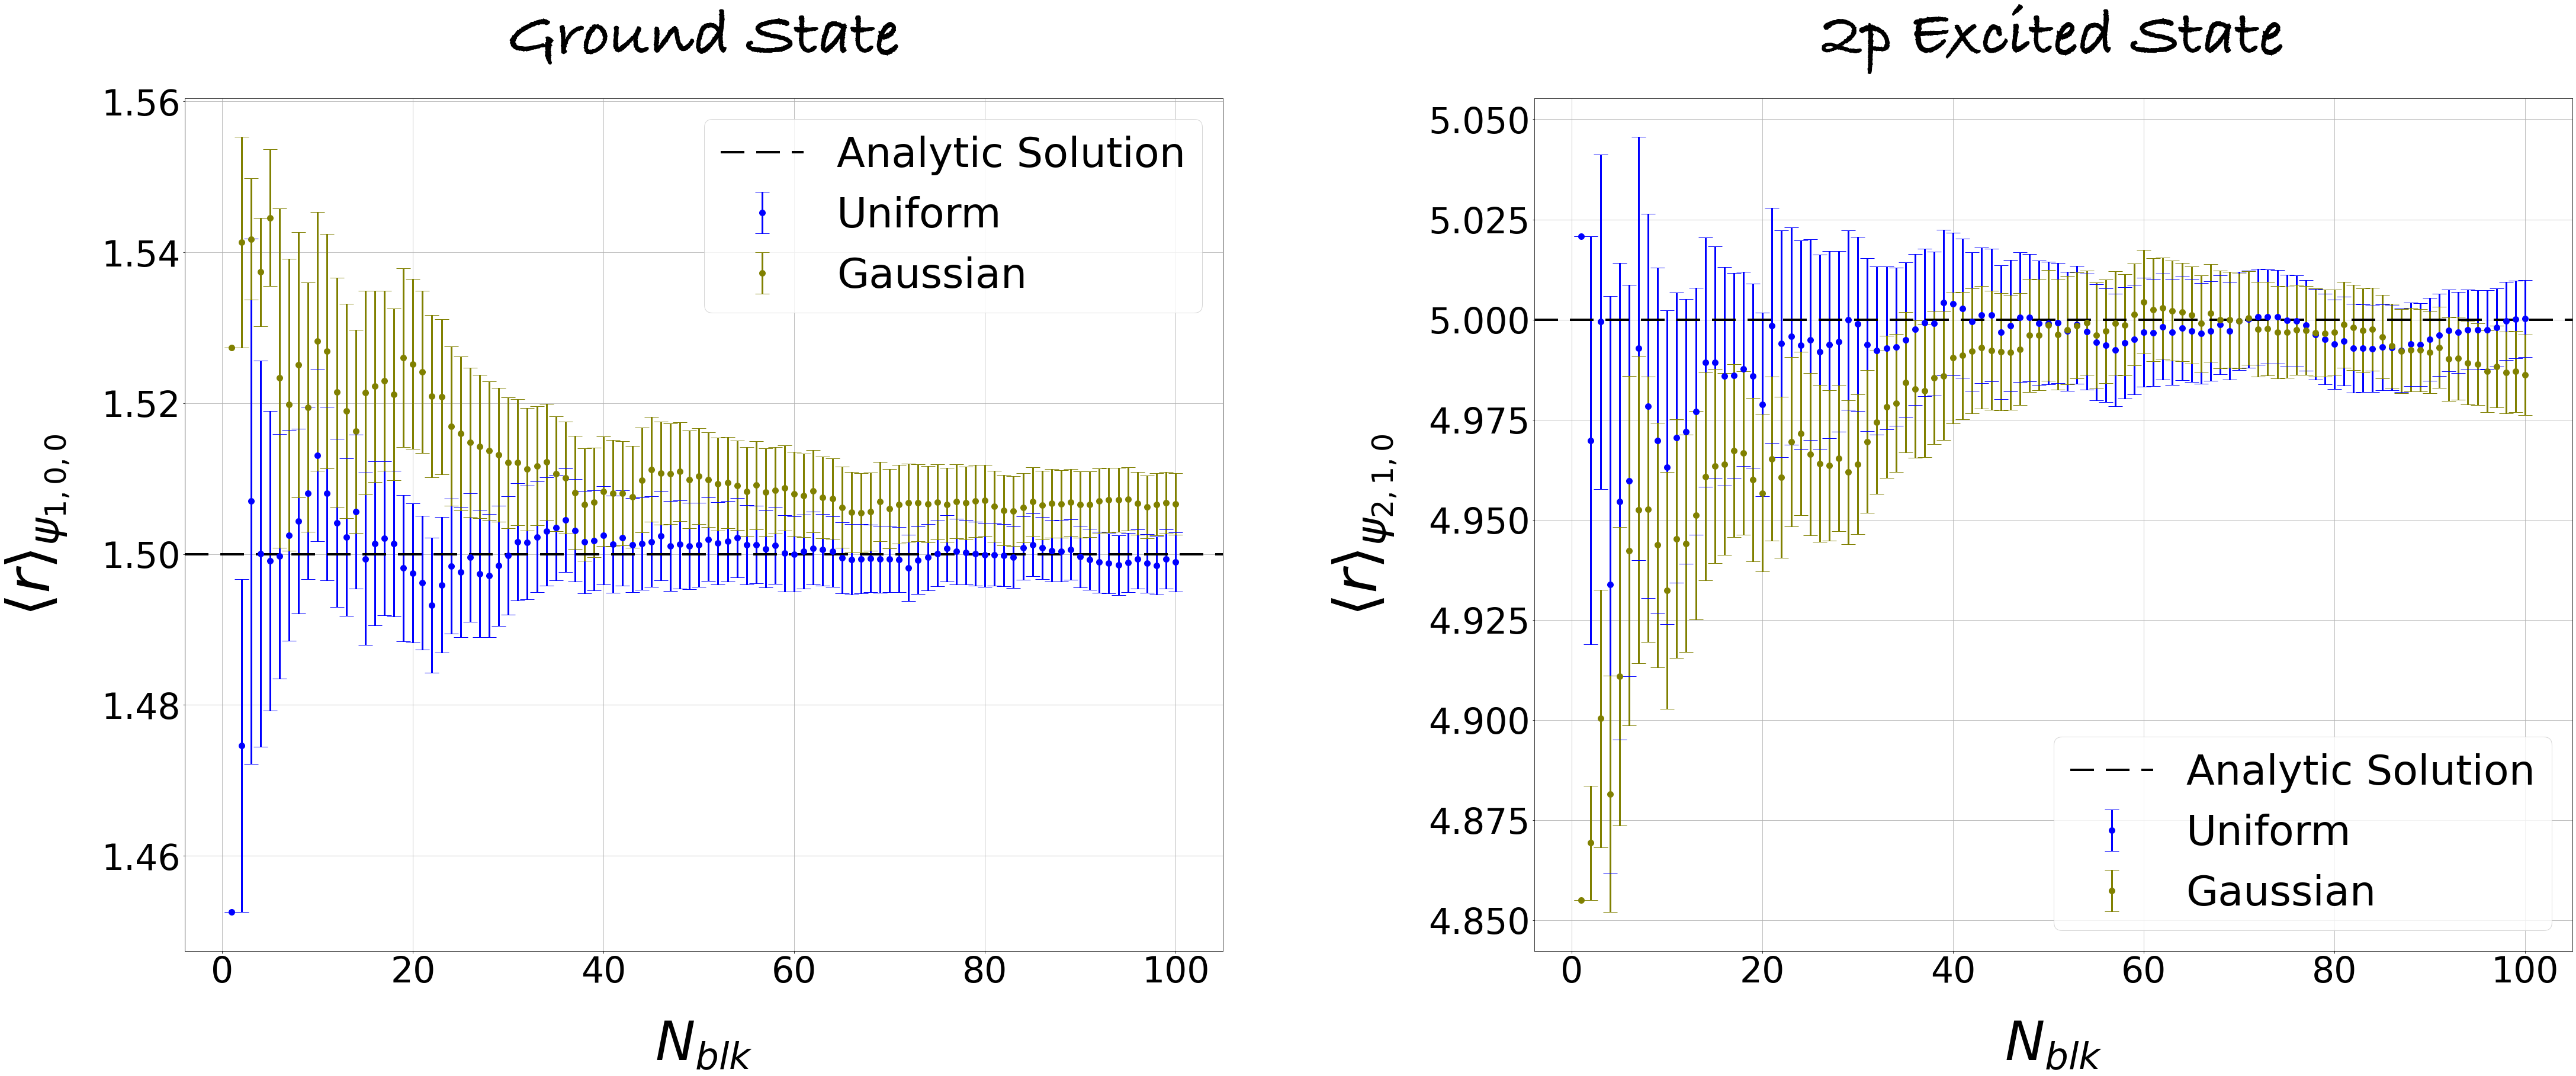

In [4]:
#########################
#plots
#########################
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)

#Ground State
plt.subplot(1, 2, 1)
plt.title('Ground State', y=1.05, fontname = 'Bradley Hand', fontsize=110)
plt.xlabel('$N_{blk}$', fontsize=90, labelpad=50)
plt.ylabel('${\\langle r \\rangle}_{\psi_{1,0,0}}$', fontsize=100, labelpad=50)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.errorbar(N_blks, r_gs, yerr=err_r_gs, fmt='ob', elinewidth=3.,
             markersize=10, capsize=12, label='Uniform')
plt.errorbar(N_blks, r_gs_gauss, yerr=err_r_gs_gauss, fmt='o', color = 'olive', elinewidth=3.,
             markersize=10, capsize=12, label='Gaussian')
plt.axhline(y=r_gs_th, color='k', linewidth=4.0, linestyle='--', dashes=(10, 5), label='Analytic Solution')
plt.legend(fontsize=70, loc='best')
plt.grid(True)

#2p Orbital
plt.subplot(1, 2, 2)
plt.title('2p Excited State', y=1.05, fontname = 'Bradley Hand', fontsize=110)
plt.xlabel('$N_{blk}$', fontsize=90, labelpad=50)
plt.ylabel('${\\langle r \\rangle}_{\psi_{2,1,0}}$', fontsize=100, labelpad=50)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.errorbar(N_blks, r_2p, yerr=err_r_2p, fmt='ob', elinewidth=3.,
             markersize=10, capsize=12, label='Uniform')
plt.errorbar(N_blks, r_2p_gauss, yerr=err_r_2p_gauss, fmt='o', color='olive', elinewidth=3.,
             markersize=10, capsize=12, label='Gaussian')
plt.axhline(y=r_2p_th, color='k', linewidth=4.0, linestyle='--', dashes=(10, 5), label='Analytic Solution')
plt.legend(fontsize=70, loc='best')
plt.grid(True)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

Both choices made for the transition probability converge very quickly to the theoretical value (black lines), and are statistically equal as it is evident from the graphs above.
The use of the block average is fundamental also in this case, being the Metropolis algorithm based on Markov chains theory, in which there is correlation between the values of the stochastic variable at two successive instants of time.
For this reason the width of the blocks must be such that the observables computed in different blocks are non-correlated to each other, in order to exploit the *CLT* consistently. In this simulation the choice to set $ L = \frac{M}{N_{blk}} = 10^4 $ is good enough, but it should be better motivated by calculating for example the autocorrelation function of the observables that one is estimating.

In the graphs that follow I show the comparison between the estimates made (only in the case of *Uniform transition probability*) by starting from two different points in the Markov chain: one high probability $ \vec{r}_0 = (1, 1, 1) $, the other low probability $ \vec{r}_0 = (20, 20, 20) $.<br>
As previously argued, the choice of the starting point affects the convergence of the algorithm: starting "far away" you need more Monte Carlo time to converge to the exact value, although in this simple case it is not so obvious and inaccurate the estimate represented with the <font color='orange'>orange errorbars</font>.

In [5]:
#########################
#load the data
#########################
#Ground State
r_gs_far, err_r_gs_far=np.loadtxt("05.1/ground_state_far.dat", usecols=(1, 2), unpack=True)

#2p Orbital
r_2p_far, err_r_2p_far=np.loadtxt("05.1/2p_orbital_far.dat", usecols=(1, 2), unpack=True)

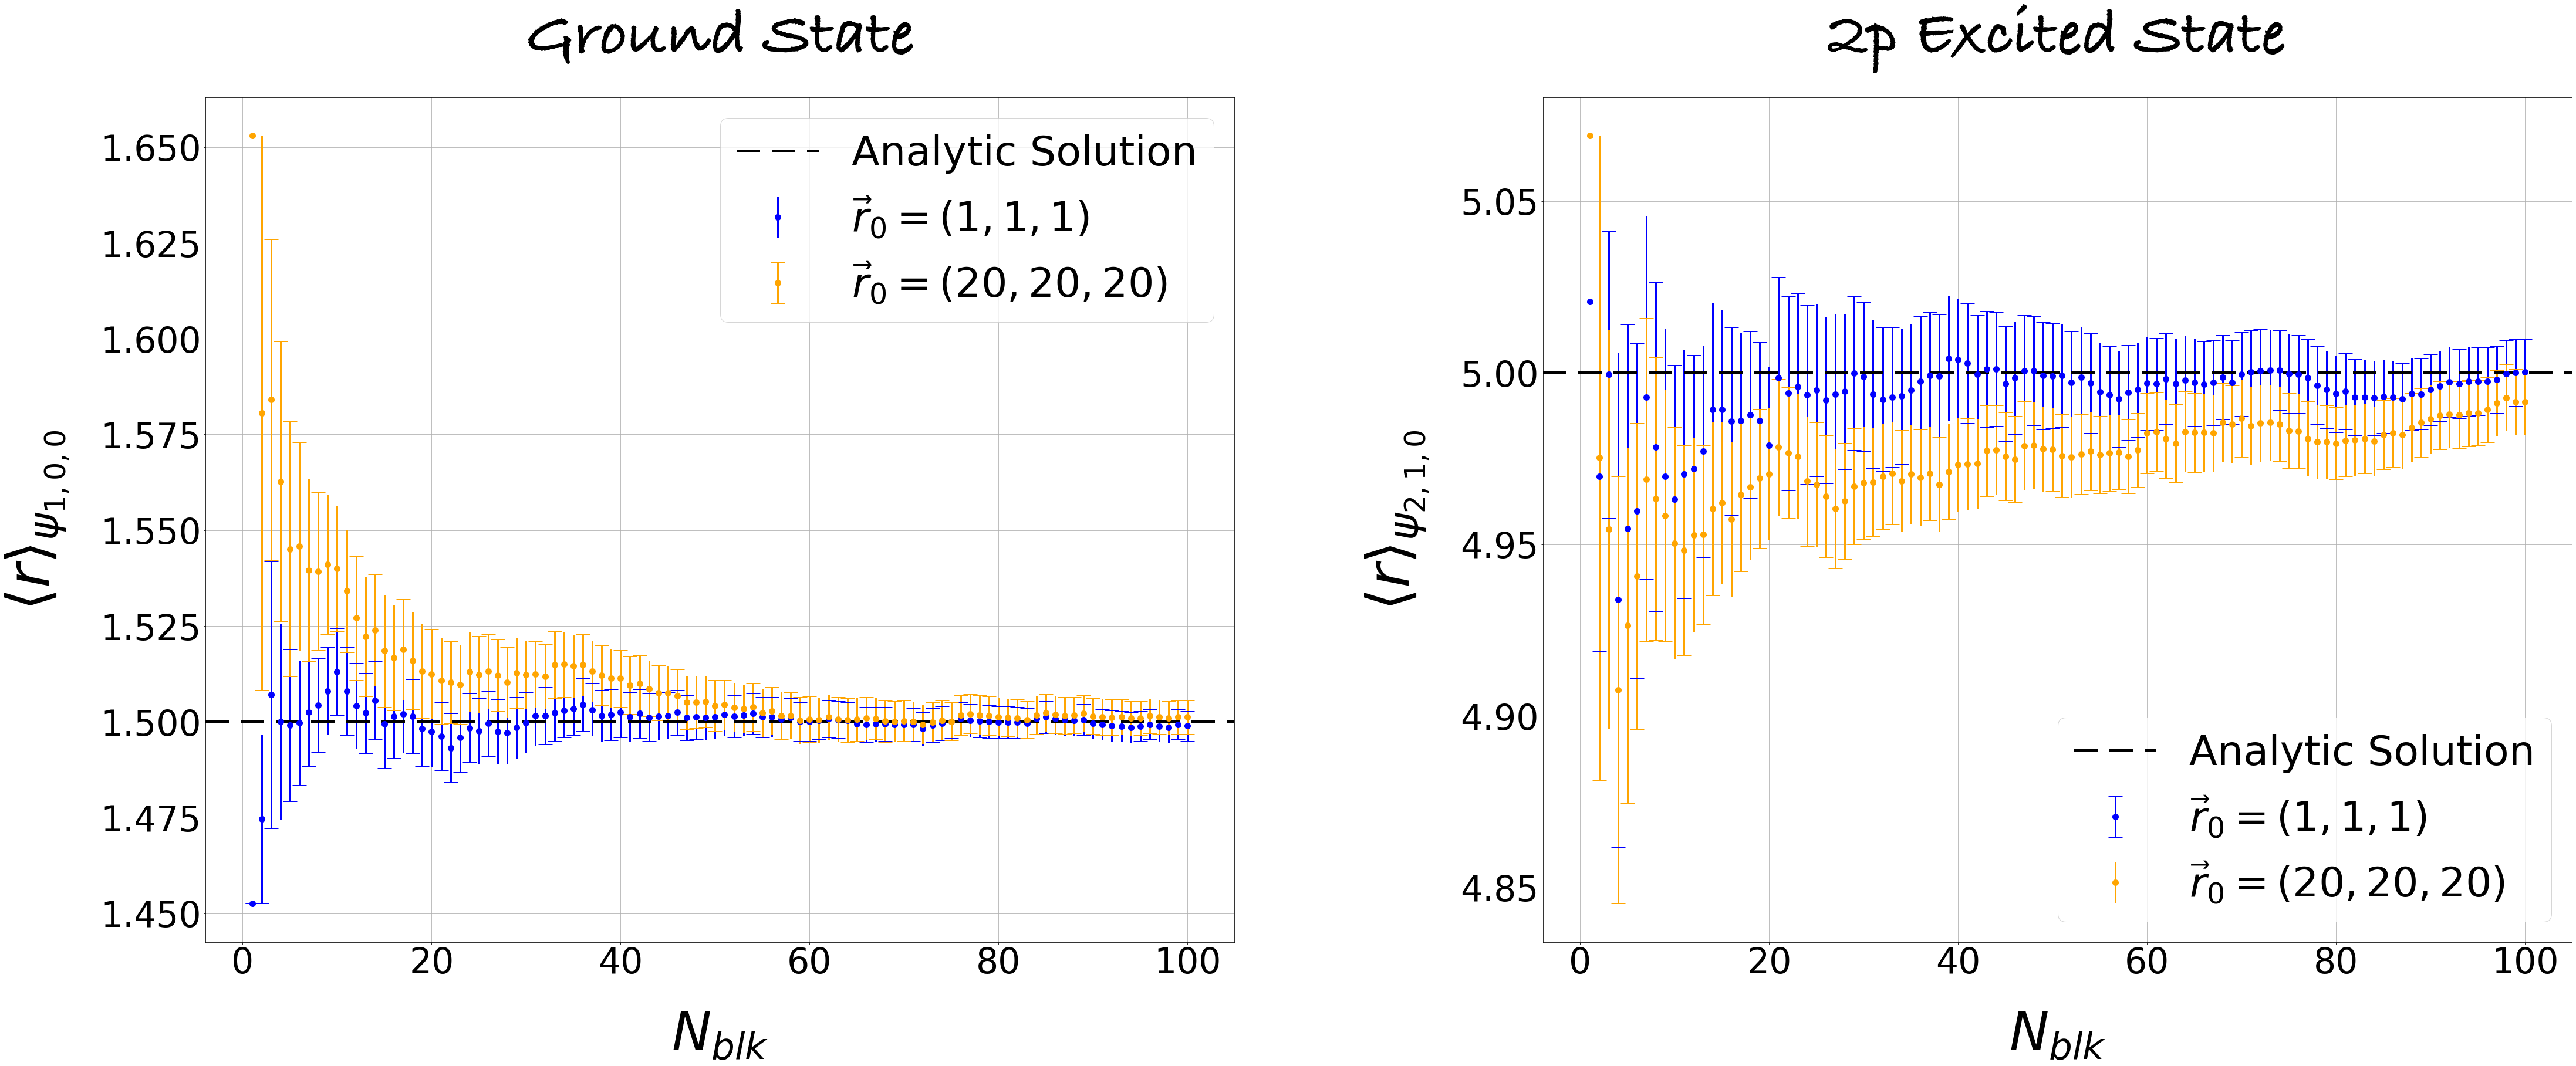

In [6]:
#########################
#plots
#########################
plt.figure(figsize=[70, 25])  #deafult (6.4,4.8)

#Ground State
plt.subplot(1, 2, 1)
plt.title('Ground State', y=1.05, fontname = 'Bradley Hand', fontsize=110)
plt.xlabel('$N_{blk}$', fontsize=90, labelpad=50)
plt.ylabel('${\\langle r \\rangle}_{\psi_{1,0,0}}$', fontsize=100, labelpad=50)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.errorbar(N_blks, r_gs, yerr=err_r_gs, fmt='ob', elinewidth=3.,
             markersize=10, capsize=12, label='$ \\vec{r}_0 = (1, 1, 1) $')
plt.errorbar(N_blks, r_gs_far, yerr=err_r_gs_far, fmt='o', color = 'orange', elinewidth=3.,
             markersize=10, capsize=12, label='$ \\vec{r}_0 = (20, 20, 20) $')
plt.axhline(y=r_gs_th, color='k', linewidth=4.0, linestyle='--', dashes=(10, 5), label='Analytic Solution')
plt.legend(fontsize=70, loc='best')
plt.grid(True)

#2p Orbital
plt.subplot(1, 2, 2)
plt.title('2p Excited State', y=1.05, fontname = 'Bradley Hand', fontsize=110)
plt.xlabel('$N_{blk}$', fontsize=90, labelpad=50)
plt.ylabel('${\\langle r \\rangle}_{\psi_{2,1,0}}$', fontsize=100, labelpad=50)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.errorbar(N_blks, r_2p, yerr=err_r_2p, fmt='ob', elinewidth=3.,
             markersize=10, capsize=12, label='$ \\vec{r}_0 = (1, 1, 1) $')
plt.errorbar(N_blks, r_2p_far, yerr=err_r_2p_far, fmt='o', color='orange', elinewidth=3.,
             markersize=10, capsize=12, label='$ \\vec{r}_0 = (20, 20, 20) $')
plt.axhline(y=r_2p_th, color='k', linewidth=4.0, linestyle='--', dashes=(10, 5), label='Analytic Solution')
plt.legend(fontsize=70, loc='lower right')
plt.grid(True)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

To conclude I show in the three dimensional space the points $ \vec{r} $ that I sampled with the **M(RT)**$ ^\textbf{2} $, both for the ground state and for the $ 2p $ excited state.<br>
As it can be seen below, the Metropolis algorithm is able to reproduce very well the typical shape of the electron orbitals of the Hydrogen atom.

In [7]:
##################################################
#Sampled points distribution into the 3D space
##################################################
#load the data
x_gs, y_gs, z_gs=np.loadtxt("05.1/gs_3D_distr.dat", usecols=(0, 1, 2), unpack=True)
x_gs_gauss, y_gs_gauss, z_gs_gauss=np.loadtxt("05.1/gs_3D_distr.dat", usecols=(3, 4, 5), unpack=True)
x_2p, y_2p, z_2p=np.loadtxt("05.1/2p_3D_distr.dat", usecols=(0, 1, 2), unpack=True)
x_2p_gauss, y_2p_gauss, z_2p_gauss=np.loadtxt("05.1/2p_3D_distr.dat", usecols=(3, 4, 5), unpack=True)

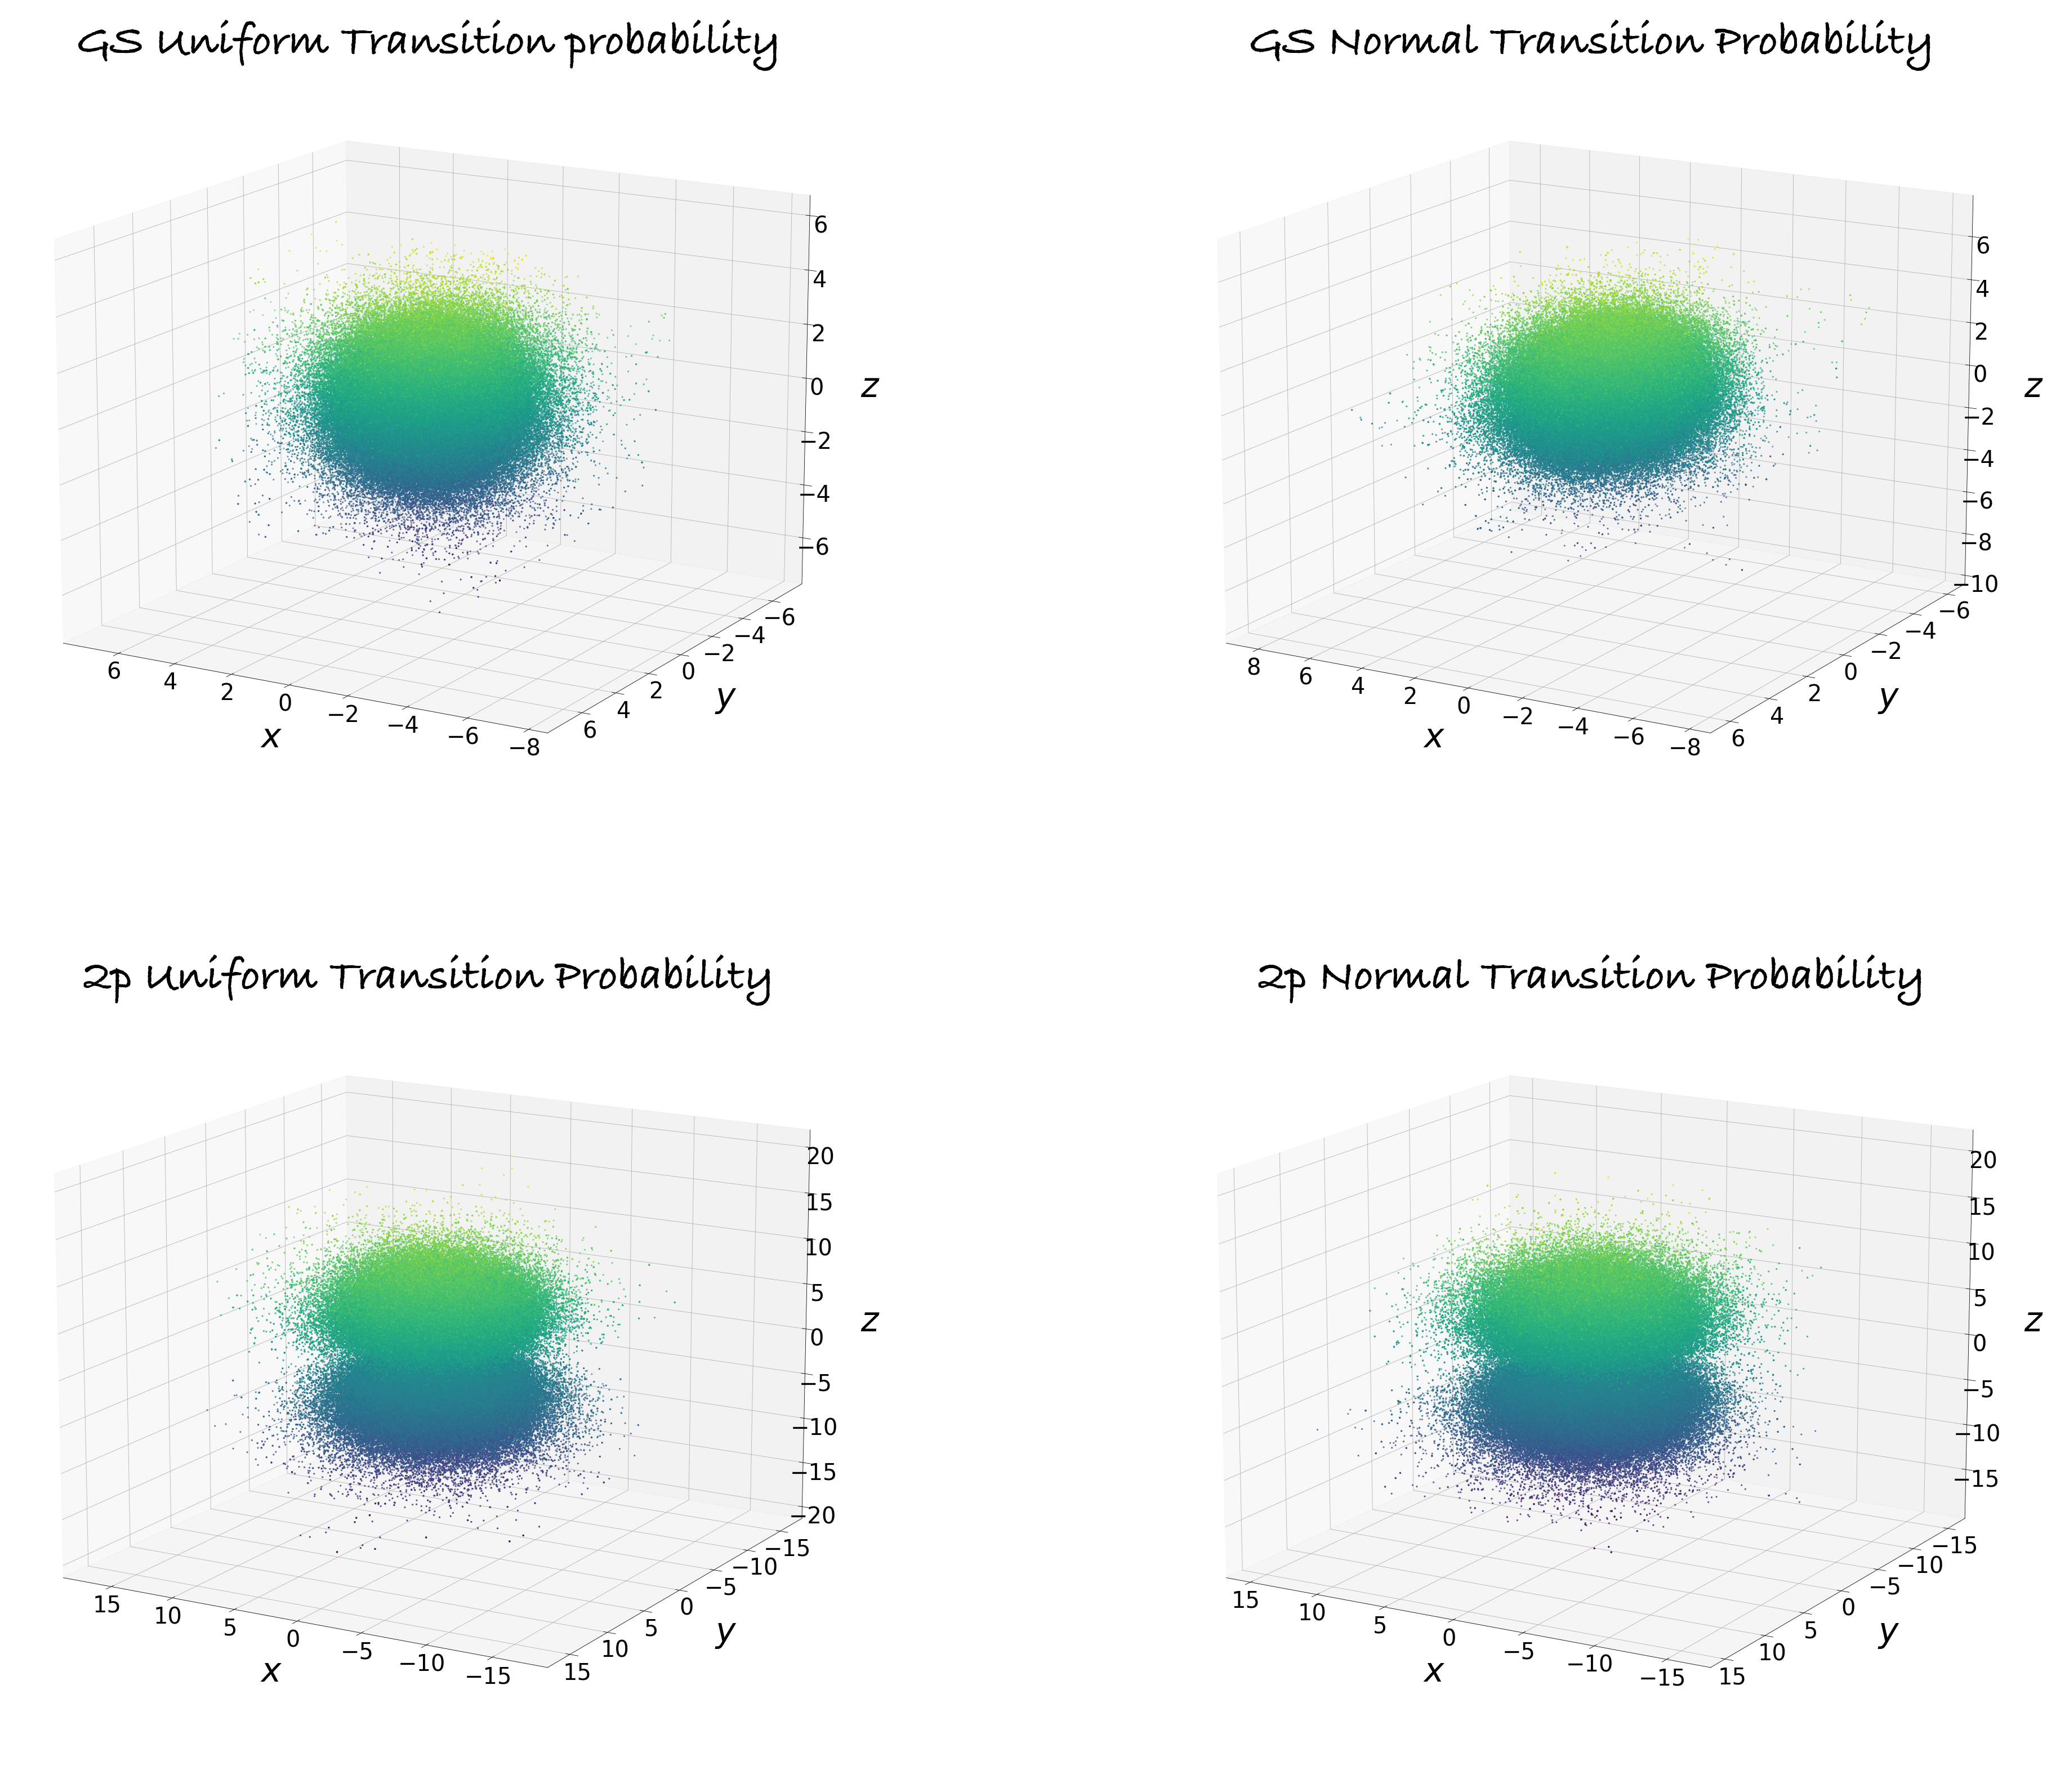

In [8]:
#plots
plt.figure(figsize=[70, 55])  #deafult (6.4,4.8)

ax = plt.subplot(2, 2, 1, projection ="3d")
ax.set_title('GS Uniform Transition probability', y=1.02, fontname = 'Bradley Hand', fontsize=80)
ax.scatter3D(x_gs, y_gs, z_gs, zdir='z', c=z_gs, marker='.')
ax.set_xlabel('$x$', fontsize=60, labelpad=50)
ax.set_ylabel('$y$', fontsize=60, labelpad=50)
ax.set_zlabel('$z$', fontsize=60, labelpad=50)
ax.view_init(15, 120)
ax.tick_params(labelsize=40)

ax = plt.subplot(2, 2, 2, projection ="3d")
ax.set_title('GS Normal Transition Probability', y=1.02, fontname = 'Bradley Hand', fontsize=80)
ax.scatter3D(x_gs_gauss, y_gs_gauss, z_gs_gauss, zdir='z', c=z_gs_gauss, marker='.')
ax.set_xlabel('$x$', fontsize=60, labelpad=50)
ax.set_ylabel('$y$', fontsize=60, labelpad=50)
ax.set_zlabel('$z$', fontsize=60, labelpad=50)
ax.view_init(15, 120)
ax.tick_params(labelsize=40)

ax = plt.subplot(2, 2, 3, projection ="3d")
ax.set_title('2p Uniform Transition Probability', y=1.02, fontname = 'Bradley Hand', fontsize=80)
ax.scatter3D(x_2p, y_2p, z_2p, zdir='z', c=z_2p, marker='.')
ax.set_xlabel('$x$', fontsize=60, labelpad=50)
ax.set_ylabel('$y$', fontsize=60, labelpad=50)
ax.set_zlabel('$z$', fontsize=60, labelpad=50)
ax.view_init(15, 120)
ax.tick_params(labelsize=40)

ax = plt.subplot(2, 2, 4, projection ="3d")
ax.set_title('2p Normal Transition Probability', y=1.02, fontname = 'Bradley Hand', fontsize=80)
ax.scatter3D(x_2p_gauss, y_2p_gauss, z_2p_gauss, zdir='z', c=z_2p_gauss, marker='.')
ax.set_xlabel('$x$', fontsize=60, labelpad=50)
ax.set_ylabel('$y$', fontsize=60, labelpad=50)
ax.set_zlabel('$z$', fontsize=60, labelpad=50)
ax.view_init(15, 120)
ax.tick_params(labelsize=40)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.05, hspace=0.1)
plt.show()